<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

<div class="alert alert-info"> Сначала импортируем все таблицы, проверяем информацию по каждой.
В каждой таблице, содержащей данные о датах, с помощью метода to_datetime приводим даты звонков/отправки смс/выхода в интернет в нужный формат для удобства дальнейшей работы.<br /><br /> «Мегалайн» всегда округляет секунды до минут, каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута, поэтому на этом этапе сразу же производим округление для каждого звонка.</div>

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import math
from scipy import stats as st
import numpy as np

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users= pd.read_csv('/datasets/users.csv')

In [2]:
calls.info()
print('Количество дубликатов: ', calls.duplicated().sum())
calls['call_date'] = pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')

def minutes_round(duration):
    return int(math.ceil(duration))
calls['duration'] = calls['duration'].apply(minutes_round)
display(calls.head(10))

for c in calls.columns:
    print(calls[c].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
Количество дубликатов:  0


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


1304_73     1
1454_193    1
1185_931    1
1340_534    1
1070_125    1
           ..
1389_142    1
1148_97     1
1101_457    1
1378_729    1
1054_587    1
Name: id, Length: 202607, dtype: int64
2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64
0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64
1377    1760
1168    1692
1375    1560
1453    1440
1196  

In [3]:
internet.info()
print('Количество дубликатов: ', internet.duplicated().sum())
internet['session_date'] = pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')
display(internet.head(10))

for c in internet.columns:
    print(internet[c].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
Количество дубликатов:  0


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


2047     1
95620    1
40249    1
38200    1
60727    1
        ..
51916    1
62155    1
64202    1
58057    1
0        1
Name: Unnamed: 0, Length: 149396, dtype: int64
1304_73     1
1230_163    1
1478_287    1
1102_180    1
1498_156    1
           ..
1180_409    1
1342_107    1
1298_14     1
1350_177    1
1040_285    1
Name: id, Length: 149396, dtype: int64
0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64
2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-01       3
2018-01-02       3
Name: session_date, Length: 365, dtype: int64
1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype

In [4]:
messages.info()
print('Количество дубликатов: ', messages.duplicated().sum())
messages['message_date'] = pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')
display(messages.head(10))

for c in messages.columns:
    print(messages[c].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Количество дубликатов:  0


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


1304_73     1
1427_49     1
1452_286    1
1424_589    1
1478_296    1
           ..
1196_121    1
1440_212    1
1440_216    1
1277_273    1
1054_587    1
Name: id, Length: 123036, dtype: int64
2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-28    699
             ... 
2018-01-07     12
2018-01-02     10
2018-01-04     10
2018-01-05     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64
1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64


In [5]:
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
users.info()
print('Количество дубликатов: ', users.duplicated().sum())
users['reg_date'] = pd.to_datetime(users['reg_date'], format= '%Y-%m-%d')
display(users.head(10))

for c in users.columns:
    print(users[c].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Количество дубликатов:  0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


1023    1
1194    1
1181    1
1182    1
1183    1
       ..
1362    1
1363    1
1364    1
1365    1
1024    1
Name: user_id, Length: 500, dtype: int64
53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64
NaN           462
2018-12-09      2
2018-12-21      2
2018-10-03      2
2018-10-14      2
2018-12-03      2
2018-11-21      1
2018-11-07      1
2018-09-02      1
2018-12-26      1
2018-12-30      1
2018-12-14      1
2018-10-05      1
2018-12-11      1
2018-11-13      1
2018-09-26      1
2018-10-27     

### Вывод
Исходные данные успешно импортированы и изучены. Таблицы не содержат дублирующихся строк, имеющиеся пропуски не требуют замены.

## Предобработка данных

<div class="alert alert-info"> С помощью сводных таблиц выполняем следующие подсчёты для каждого пользователя:<br />
<br /> 
1. количество сделанных звонков и израсходованных минут разговора по месяцам;<br />
2. количество отправленных сообщений по месяцам;<br />
3. объем израсходованного интернет-трафика по месяцам.<br /><br />
Даты приводим к формату datetime64[M], чтобы сохранить только месяц и год.
</div>

In [7]:
calls['month'] = calls['call_date'].astype('datetime64[M]')
calls_pivot = calls.pivot_table(index =['user_id', 'month'], values= 'duration', aggfunc = ['count', 'sum'])
calls_pivot.columns=['calls','calls_minutes_sum']
calls_pivot

calls  calls_minutes_sum
user_id month                               
1000    2018-05-01     22                159
        2018-06-01     43                172
        2018-07-01     47                340
        2018-08-01     52                408
        2018-09-01     58                466
...                   ...                ...
1498    2018-10-01     41                247
1499    2018-09-01      9                 70
        2018-10-01     68                449
        2018-11-01     74                612
        2018-12-01     69                492

[3174 rows x 2 columns]

In [8]:
messages['month'] = messages['message_date'].astype('datetime64[M]')
messages_pivot = messages.pivot_table(index =['user_id', 'month'], values='id', aggfunc = 'count')
messages_pivot.columns = ['sms']
messages_pivot

sms
user_id month          
1000    2018-05-01   22
        2018-06-01   60
        2018-07-01   75
        2018-08-01   81
        2018-09-01   57
...                 ...
1498    2018-10-01   42
1499    2018-09-01   11
        2018-10-01   48
        2018-11-01   59
        2018-12-01   66

[2717 rows x 1 columns]

<div class="alert alert-info"> «Мегалайн» всегда округляет мегабайты — до гигабайт. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. <br /> Исходя из этого с помощью функции округляем месячное количество трафика до целых Гб, записываем результат в новую колонку.
</div>

In [9]:
internet['month'] = internet['session_date'].astype('datetime64[M]')
internet_pivot = internet.pivot_table(index =['user_id', 'month'], values='mb_used', aggfunc = 'sum')

def gb_round(mb_used):
    return int(math.ceil(mb_used / 1024))
internet_pivot['gb_used']  = internet_pivot['mb_used'].apply(gb_round)  
internet_pivot

mb_used  gb_used
user_id month                        
1000    2018-05-01  2,253.49        3
        2018-06-01 23,233.77       23
        2018-07-01 14,003.64       14
        2018-08-01 14,055.93       14
        2018-09-01 14,568.91       15
...                      ...      ...
1498    2018-10-01 20,579.36       21
1499    2018-09-01  1,845.75        2
        2018-10-01 17,788.51       18
        2018-11-01 17,963.31       18
        2018-12-01 13,055.58       13

[3203 rows x 2 columns]

<div class="alert alert-info"> Затем поочерёдно объединяем сводные таблицы по колонкам user_id и month.
</div>

In [10]:
calls_pivot.reset_index(inplace=True)
messages_pivot.reset_index(inplace=True)
internet_pivot.reset_index(inplace=True)


In [11]:
data_merged = calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer')
data_merged

,user_id,month,calls,calls_minutes_sum,sms
0,1000,2018-05-01,22.00,159.00,22.00
1,1000,2018-06-01,43.00,172.00,60.00
2,1000,2018-07-01,47.00,340.00,75.00
3,1000,2018-08-01,52.00,408.00,81.00
4,1000,2018-09-01,58.00,466.00,57.00
...,...,...,...,...,...
3208,1489,2018-08-01,nan,nan,17.00
3209,1489,2018-09-01,nan,nan,32.00
3210,1489,2018-10-01,nan,nan,21.00
3211,1489,2018-11-01,nan,nan,20.00


In [12]:
data_merged = data_merged.merge(internet_pivot, on=['user_id', 'month'], how='outer')
data_merged

,user_id,month,calls,calls_minutes_sum,sms,mb_used,gb_used
0,1000,2018-05-01,22.00,159.00,22.00,"2,253.49",3.00
1,1000,2018-06-01,43.00,172.00,60.00,"23,233.77",23.00
2,1000,2018-07-01,47.00,340.00,75.00,"14,003.64",14.00
3,1000,2018-08-01,52.00,408.00,81.00,"14,055.93",14.00
4,1000,2018-09-01,58.00,466.00,57.00,"14,568.91",15.00
...,...,...,...,...,...,...,...
3209,1489,2018-09-01,nan,nan,32.00,"17,206.30",17.00
3210,1489,2018-10-01,nan,nan,21.00,"19,559.44",20.00
3211,1489,2018-11-01,nan,nan,20.00,"17,491.56",18.00
3212,1489,2018-12-01,nan,nan,35.00,"17,322.51",17.00


In [13]:
data_merged = users.merge(data_merged, on='user_id', how='outer')
data_merged

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls,calls_minutes_sum,sms,mb_used,gb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,22.00,159.00,22.00,"2,253.49",3.00
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,43.00,172.00,60.00,"23,233.77",23.00
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,47.00,340.00,75.00,"14,003.64",14.00
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,52.00,408.00,81.00,"14,055.93",14.00
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,58.00,466.00,57.00,"14,568.91",15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-10-01,41.00,247.00,42.00,"20,579.36",21.00
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-09-01,9.00,70.00,11.00,"1,845.75",2.00
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-10-01,68.00,449.00,48.00,"17,788.51",18.00
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-11-01,74.00,612.00,59.00,"17,963.31",18.00


<div class="alert alert-info"> Создаём функцию для расчета помесячной выручки с каждого пользователя (вычитаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножаем на значение из тарифного плана; прибавляем абонентскую плату, соответствующую тарифному плану). Полученные значения записываем в колонку revenue_month объединённой таблицы.
</div>

In [14]:
a_ultra = tariffs.query('tariff_name == "ultra"')[['minutes_included']]['minutes_included'][1]
b_ultra = tariffs.query('tariff_name == "ultra"')[['messages_included']]['messages_included'][1]
c_ultra = tariffs.query('tariff_name == "ultra"')[['mb_per_month_included']]['mb_per_month_included'][1] / 1024
d_ultra = tariffs.query('tariff_name == "ultra"')[['rub_monthly_fee']]['rub_monthly_fee'][1]
e_ultra = tariffs.query('tariff_name == "ultra"')[['rub_per_gb']]['rub_per_gb'][1]

a_smart = tariffs.query('tariff_name == "smart"')[['minutes_included']]['minutes_included'][0]
b_smart = tariffs.query('tariff_name == "smart"')[['messages_included']]['messages_included'][0]
c_smart = tariffs.query('tariff_name == "smart"')[['mb_per_month_included']]['mb_per_month_included'][0] / 1024
d_smart = tariffs.query('tariff_name == "smart"')[['rub_monthly_fee']]['rub_monthly_fee'][0]
e_smart = tariffs.query('tariff_name == "smart"')[['rub_per_gb']]['rub_per_gb'][0]
a_ultra
def revenue_month(data):
    minutes_over = 0
    gb_over = 0
    sms_over = 0
    if data['tariff'] == 'ultra':
        if data['calls_minutes_sum'] > a_ultra:
            minutes_over = data['calls_minutes_sum'] - a_ultra
        if data['sms'] > b_ultra:
            sms_over = data['sms'] - b_ultra
        if data['gb_used'] > c_ultra:
            gb_over = data['gb_used'] - c_ultra
        return d_ultra + minutes_over + sms_over + gb_over*e_ultra
    elif data['tariff'] == 'smart':
        if data['calls_minutes_sum'] > a_smart:
            minutes_over = data['calls_minutes_sum'] - a_smart
        if data['sms'] > b_smart:
            sms_over = data['sms'] - b_smart
        if data['gb_used'] > c_smart:
            gb_over = data['gb_used'] - c_smart
        return d_smart + minutes_over*3 + sms_over*3 + gb_over*e_smart
    


data_merged['revenue_month'] = data_merged.apply(revenue_month, axis=1)

data_merged

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls,calls_minutes_sum,sms,mb_used,gb_used,revenue_month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,22.00,159.00,22.00,"2,253.49",3.00,"1,950.00"
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,43.00,172.00,60.00,"23,233.77",23.00,"1,950.00"
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,47.00,340.00,75.00,"14,003.64",14.00,"1,950.00"
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,52.00,408.00,81.00,"14,055.93",14.00,"1,950.00"
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,58.00,466.00,57.00,"14,568.91",15.00,"1,950.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-10-01,41.00,247.00,42.00,"20,579.36",21.00,"1,750.00"
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-09-01,9.00,70.00,11.00,"1,845.75",2.00,550.00
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-10-01,68.00,449.00,48.00,"17,788.51",18.00,"1,150.00"
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-11-01,74.00,612.00,59.00,"17,963.31",18.00,"1,513.00"


## Анализ данных

<div class="alert alert-info"> Далее изучаем поведение клиентов на основе полученных на предыдущем этапе данных.
</div>

In [15]:
display(data_merged.query('tariff == "smart"')[['calls_minutes_sum']].describe())
print('Дисперсия равна: ', np.var(data_merged.query('tariff == "smart"')[['calls_minutes_sum']]))

,calls_minutes_sum
count,"2,223.00"
mean,419.06
std,189.33
min,0.00
25%,285.00
50%,423.00
75%,545.50
max,"1,435.00"


Дисперсия равна:  calls_minutes_sum   35,828.07
dtype: float64


In [16]:
display(data_merged.query('tariff == "smart"')[['sms']].describe())
print('Дисперсия равна: ', np.var(data_merged.query('tariff == "smart"')[['sms']]))

,sms
count,"1,922.00"
mean,38.72
std,26.79
min,1.00
25%,17.00
50%,34.00
75%,55.00
max,143.00


Дисперсия равна:  sms   717.22
dtype: float64


In [17]:
display(data_merged.query('tariff == "smart"')[['gb_used']].describe())
print('Дисперсия равна: ', np.var(data_merged.query('tariff == "smart"')[['gb_used']]))

,gb_used
count,"2,228.00"
mean,16.34
std,5.74
min,0.00
25%,13.00
50%,17.00
75%,20.00
max,38.00


Дисперсия равна:  gb_used   32.91
dtype: float64


In [18]:
display(data_merged.query('tariff == "ultra"')[['calls_minutes_sum']].describe())
print('Дисперсия равна: ', np.var(data_merged.query('tariff == "ultra"')[['calls_minutes_sum']]))

,calls_minutes_sum
count,951.00
mean,545.45
std,306.93
min,0.00
25%,310.00
50%,528.00
75%,756.50
max,"1,673.00"


Дисперсия равна:  calls_minutes_sum   94,104.36
dtype: float64


In [19]:
display(data_merged.query('tariff == "ultra"')[['sms']].describe())
print('Дисперсия равна: ', np.var(data_merged.query('tariff == "ultra"')[['sms']]))

,sms
count,795.00
mean,61.16
std,45.93
min,1.00
25%,24.00
50%,51.00
75%,87.50
max,224.00


Дисперсия равна:  sms   2,107.01
dtype: float64


In [20]:
display(data_merged.query('tariff == "ultra"')[['gb_used']].describe())
print('Дисперсия равна: ', np.var(data_merged.query('tariff == "ultra"')[['gb_used']]))

,gb_used
count,975.00
mean,19.69
std,9.70
min,0.00
25%,12.00
50%,19.00
75%,27.00
max,49.00


Дисперсия равна:  gb_used   94.05
dtype: float64


In [21]:
display(data_merged.query('tariff == "smart"')[['revenue_month']].describe())
display(data_merged.query('tariff == "ultra"')[['revenue_month']].describe())

,revenue_month
count,"2,230.00"
mean,"1,289.64"
std,818.37
min,550.00
25%,550.00
50%,"1,021.00"
75%,"1,750.00"
max,"6,770.00"


,revenue_month
count,986.00
mean,"2,070.03"
std,376.02
min,"1,950.00"
25%,"1,950.00"
50%,"1,950.00"
75%,"1,950.00"
max,"4,800.00"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62154a7f50>,
      dtype=object)

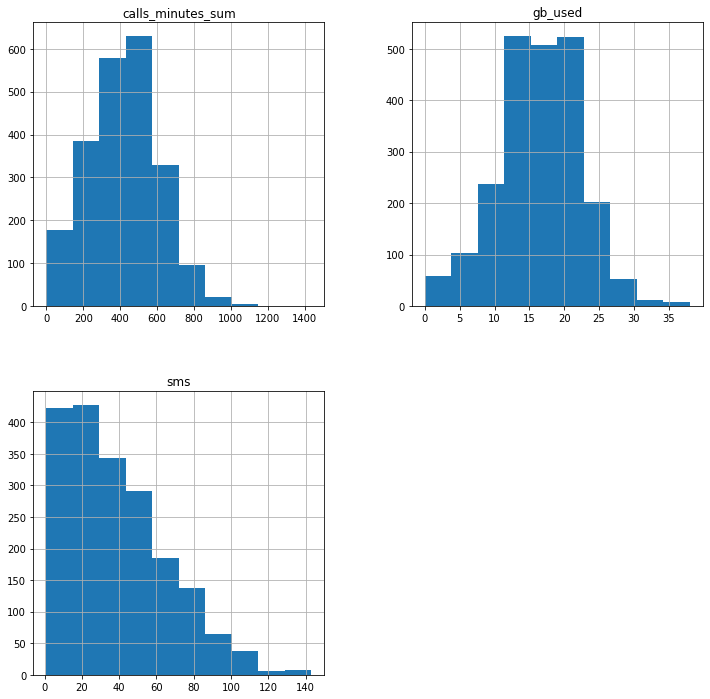

In [22]:
data_merged.query('tariff == "smart"')[['calls_minutes_sum', 'gb_used', 'sms']].hist(figsize=(12, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62146bd3d0>,
      dtype=object)

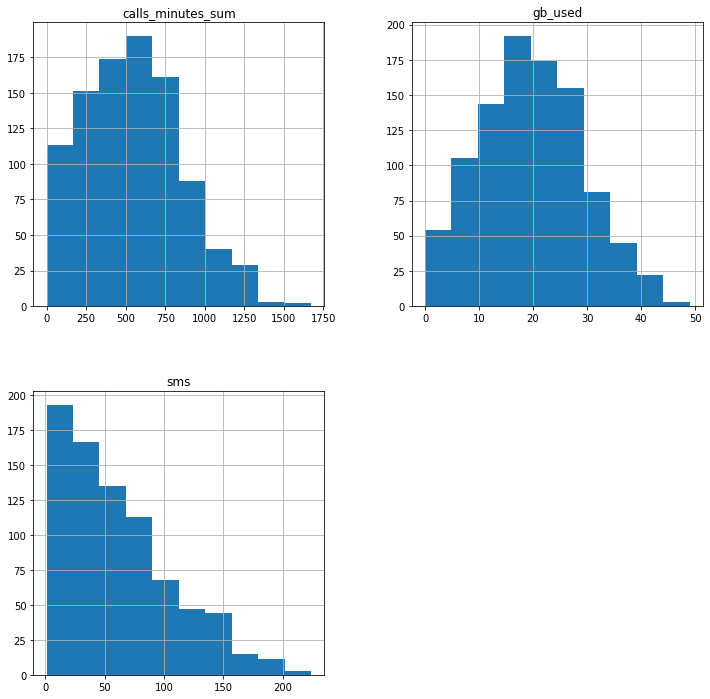

In [23]:
data_merged.query('tariff == "ultra"')[['calls_minutes_sum', 'gb_used', 'sms']].hist(figsize=(12, 12))

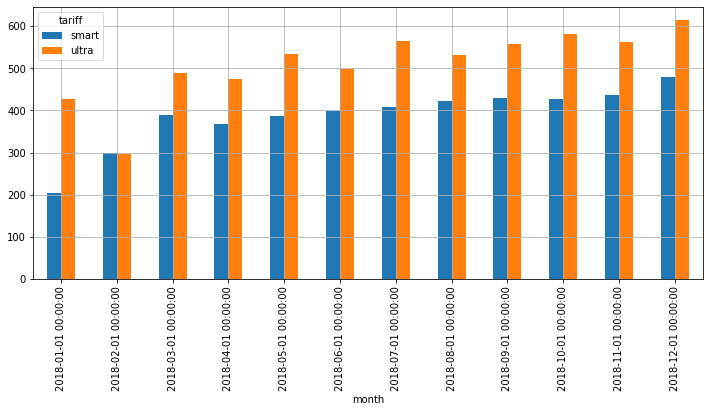

In [24]:
(data_merged
     .pivot_table(index ='month', values= 'calls_minutes_sum',columns='tariff', aggfunc = 'mean')
     .plot(kind='bar', grid=True, figsize=(12, 5))
)

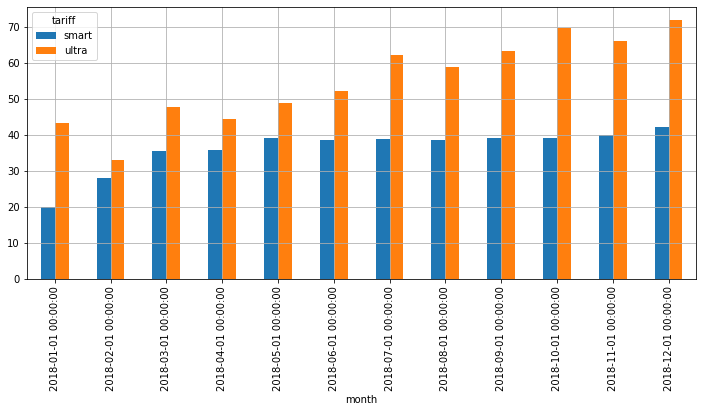

In [25]:
(data_merged
     .pivot_table(index ='month', values= 'sms', columns='tariff', aggfunc = 'mean')
     .plot(kind='bar', grid=True, figsize=(12, 5))
)

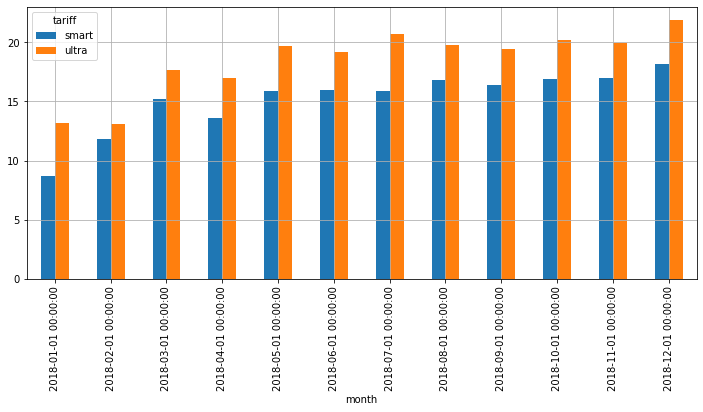

In [26]:
(data_merged
     .pivot_table(index ='month', values= 'gb_used', columns='tariff', aggfunc = 'mean')
     .plot(kind='bar', grid=True, figsize=(12, 5))
)

### Вывод

Так выглядит поведение пользователей тарифа smart за 2018 год по месяцам:<br /> 
минуты разговоров: среднее - 419.06, стандартное отклонение - 189.33, дисперсия - 35828.06,<br /> 
смс: среднее - 38.72, стандартное отклонение - 26.79, дисперсия - 717.22,<br /> 
интернет-траффик (Гб): среднее - 16.34, стандартное отклонение - 5.74, дисперсия - 32.91.<br /> 
<br /> 
Аналогичные показатели для пользователей тарифа Ultra:<br /> 
минуты разговоров: среднее - 545.45, стандартное отклонение - 306.92, дисперсия - 94104.36,<br /> 
смс: среднее - 61.16, стандартное отклонение - 49.93, дисперсия - 2107,<br /> 
интернет-траффик (Гб): среднее - 19.69, стандартное отклонение - 9.7, дисперсия - 94.05.<br /> 
<br /> 
Распределение показателей по месяцам для пользователей тарифа Smart выглядит следующим образом:<br /> 
Средняя продолжительность звонков увеличивалсь в течение года и в декабре превысила январские показатели более чем в 2 раза.<br /> 
Среднее количество смс увеличивалось с января по май, увеличилось вдвое и далее оставалось практически неизменным весь оставшийся год. <br /> 
Объём интернет-траффика увеличился вдвое с января по март, затем незначительно снизился в апреле и далее оставался примерно на одном уровне до конца года.<br /> 
<br /> 
Что касается пользователей тарифа Ultra:<br /> 
Средняя продолжительность звонков была минимальной в феврале, затем в течение года колебалась от месяца к месяцу,но постепенно достигла максимума в декабре.<br /> 
Среднее количество смс также было минимальным в феврале и постепенно росло, достигнув максимума к концу года. <br /> 
Объём интернет-траффика увеличивался с января по май, затем оставался примерно на одном уровне и достиг пика в декабре.<br /> <br /> 
В целом объёмы использования услуг по обоим тарифам постепенно росли в течение года.<br /> <br /> 
На гистограммах видно, что пользователи тарифа smart гораздо чаще используют дополнительные минуты, смс и гигабайты, чем пользователи тарифа Ultra. Вторые перерасходуют только интернет-траффик, и никто из пользователей этого тарифа не использует полностью заложенные в пакет минуты и смс.


## Проверка гипотез

<div class="alert alert-info"> Проверим первую гипотезу, которая звучит так: выручка пользователей тарифа Ultra равна выручке пользователей тарифа Smart.<br /> 
Сначала проверим дисперсии обоих показателей:
</div>

In [27]:
print('Дисперсия выручки для тарифа Smart равна: ', np.var(data_merged.query('tariff == "smart"')[['revenue_month']]))
print('Дисперсия выручки для тарифа Ultra равна: ', np.var(data_merged.query('tariff == "ultra"')[['revenue_month']]))

Дисперсия выручки для тарифа Smart равна:  revenue_month   669,430.44
dtype: float64
Дисперсия выручки для тарифа Ultra равна:  revenue_month   141,244.32
dtype: float64


<div class="alert alert-info"> Дисперсии не равны, поэтому при расчёте будем использовать equal_var = False. Далее проверяем гипотезу о равенстве средних двух независимых совокупностей:
</div>

In [28]:
alpha = .01

results = st.ttest_ind(
    data_merged.query('tariff == "smart"')[['revenue_month']], 
    data_merged.query('tariff == "ultra"')[['revenue_month']],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [1.92701139e-250]
Отвергаем нулевую гипотезу


<div class="alert alert-info"> Проверим вторую гипотезу, которая звучит так: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.<br /> 
Сначала проверим дисперсии обоих показателей:
</div>

In [29]:
print('Дисперсия выручки для пользователей из Москвы: ', np.var(data_merged.query('city == "Москва"')[['revenue_month']]))
print('Дисперсия выручки для пользователей из других регионов: ', np.var(data_merged.query('city != "Москва"')[['revenue_month']]))

Дисперсия выручки для пользователей из Москвы:  revenue_month   564,710.71
dtype: float64
Дисперсия выручки для пользователей из других регионов:  revenue_month   653,818.49
dtype: float64


<div class="alert alert-info"> Дисперсии не равны, поэтому при расчёте будем использовать equal_var = False. Далее проверяем гипотезу о равенстве средних двух независимых совокупностей:
</div>

In [30]:
alpha = .01

results = st.ttest_ind(
    data_merged.query('city == "Москва"')[['revenue_month']], 
    data_merged.query('city != "Москва"')[['revenue_month']],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.52169521]
Не получилось отвергнуть нулевую гипотезу


### Вывод
Проверив две гипотезы, делаем следующий вывод: <br /> 
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;<br /> 
2. средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод
В данном исследовании был проведён анализ данных об использовании двух разных тарифов оператора сотовой связи «Мегалайн» за 2018 год. В ходе исследования были сделаны следующие выводы:<br /><br /> 
Поведение пользователей тарифа smart за 2018 год по месяцам:<br /> 
минуты разговоров: среднее - 419.06, стандартное отклонение - 189.33, дисперсия - 35828.06,<br /> 
смс: среднее - 38.72, стандартное отклонение - 26.79, дисперсия - 717.22,<br /> 
интернет-траффик (Гб): среднее - 16.34, стандартное отклонение - 5.74, дисперсия - 32.91.<br /> 
<br /> 
Аналогичные показатели для пользователей тарифа Ultra:<br /> 
минуты разговоров: среднее - 545.45, стандартное отклонение - 306.92, дисперсия - 94104.36,<br /> 
смс: среднее - 61.16, стандартное отклонение - 49.93, дисперсия - 2107,<br /> 
интернет-траффик (Гб): среднее - 19.69, стандартное отклонение - 9.7, дисперсия - 94.05.<br /> 
<br /> 
Распределение показателей по месяцам для пользователей тарифа Smart выглядит следующим образом:<br /> 
Средняя продолжительность звонков увеличивалсь в течение года и в декабре превысила январские показатели более чем в 2 раза.<br /> 
Среднее количество смс увеличивалось с января по май, увеличилось вдвое и далее оставалось практически неизменным весь оставшийся год. <br /> 
Объём интернет-траффика увеличился вдвое с января по март, затем незначительно снизился в апреле и далее оставался примерно на одном уровне до конца года.<br /> 
<br /> 
Что касается пользователей тарифа Ultra:<br /> 
Средняя продолжительность звонков была минимальной в феврале, затем в течение года колебалась от месяца к месяцу,но постепенно достигла максимума в декабре.<br /> 
Среднее количество смс также было минимальным в феврале и постепенно росло, достигнув максимума к концу года. <br /> 
Объём интернет-траффика увеличивался с января по май, затем оставался примерно на одном уровне и достиг пика в декабре.<br /> <br /> 
В целом объёмы использования услуг по обоим тарифам постепенно росли в течение года.<br /> <br /> 
Пользователи тарифа smart гораздо чаще используют дополнительные минуты, смс и гигабайты, чем пользователи тарифа Ultra. Вторые перерасходуют только интернет-траффик, и никто из пользователей этого тарифа не использует полностью заложенные в пакет минуты и смс.

Также было установлено, что средняя выручка пользователей тарифов Ultra и Smart различаются, она выше у пользователей тарифа Ultra;
средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. 